In [1]:
%matplotlib inline

import bomber, rasterio
import matplotlib.pyplot as plt
import numpy

In [2]:
def plot_geotiff(geotiff):
    """ Plot a geotiff
    """
    with rasterio.drivers():
        with rasterio.open(geotiff) as src:
            fig = plt.figure(figsize=(11, 11))
            data = numpy.ma.MaskedArray(
                data=src.read(1), 
                mask=src.read_masks(1))
            ax = fig.gca()
            ax.imshow(data, cmap=plt.get_cmap('coolwarm'))
            ax.set_aspect('equal')
            ax.set_axis_off()
    return fig, ax

#### Get measurements

These are gridded maps of BoM measurements, interpolated from observations around the country

In [3]:
# Load a dataset - print bomber.measurements.DATASETS to see
# available values for dataset argument
bomber.measurements.DATASETS

{'ndvi': ['ndviave'],
 'rainfall': ['totals'],
 'solar': ['solarave'],
 'temperature': ['maxave', 'minave'],
 'vprp': ['vprp09', 'vprp15']}

In [4]:
geotiff = bomber.get_measurements(dataset='rainfall', year=2015, month=1)

Downloaded data to rainfall_totals_month_2015010120150131.geotiff


/home/jess/.conda/lib/python3.4/site-packages/rasterio/__init__.py:94: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [5]:
!ls

bom_grid_import.ipynb
decadal-rainfall_r_1986_10
decadal-rainfall_r_1986_10.Z
latest.grid
rainfall_totals_month_2014010120140131
rainfall_totals_month_2014010120140131.geotiff
rainfall_totals_month_2014010120140131.geotiff.msk
rainfall_totals_month_2015010120150131
rainfall_totals_month_2015010120150131.geotiff
rainfall_totals_month_2015010120150131.geotiff.msk
rainfall_totals_month_2015010120150131.Z
request_bom_data.ipynb
solar_solarave_month_2014010120140131
solar_solarave_month_2014010120140131.geotiff
solar_solarave_month_2014010120140131.geotiff.msk
solar_solarave_month_2014010120140131.Z


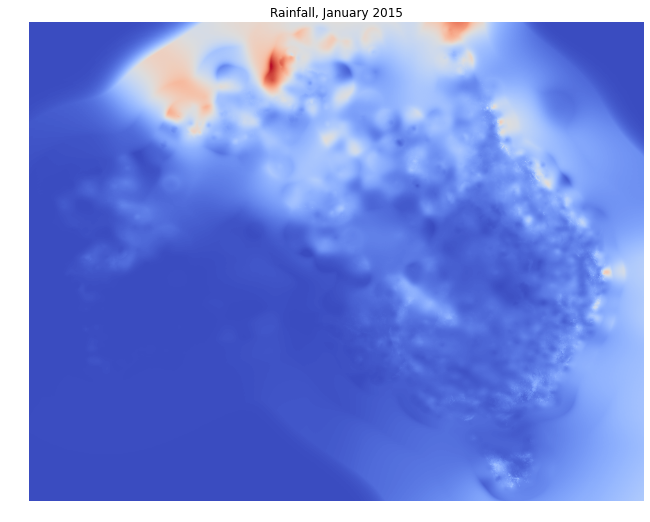

In [6]:
f, ax = plot_geotiff(geotiff)
ax.set_title('Rainfall, January 2015')

#### Get climate datasets

These are datasets which represent climatic averages from BoM's data

In [7]:
%matplotlib inline

import bomber, rasterio
import matplotlib.pyplot as plt
import numpy

In [8]:
bomber.climate.DATASETS

{'decadal-rainfall': ['r'], 'decadal-temperature': ['mx', 'mn']}

In [9]:
bomber.get_climate('decadal-rainfall', start_year=1986)

Downloaded data to decadal-rainfall_r_1986_10.geotiff


/home/jess/.conda/lib/python3.4/site-packages/rasterio/__init__.py:94: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


'decadal-rainfall_r_1986_10.geotiff'